In [190]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans 

In [191]:
# Reading the data from the csv file
data = pd.read_csv('GPSapps/googleplaystore.csv')

In [192]:
# Clean data from negative, nan, zero values
data = data.replace([float('inf'), float('-inf'),str('NaN')], pd.NA).dropna()
data
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


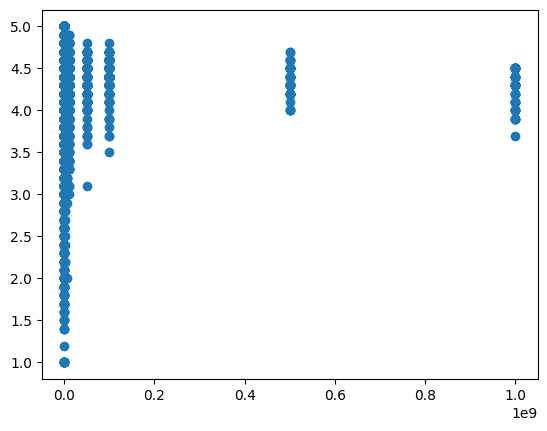

In [211]:
# Transforming non-numerical data to numerical data
data.dtypes

# reviews to int
# data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
# data['Size'] = data['Size'][0:-1]

# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Remove invalid entries in 'Installs' and convert to integers
data['Installs'] = data['Installs'].astype(str)
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Price' to numeric
data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace('$', '', regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Convert 'Size' to numberic
data['Size'] = data['Size'].astype(str).fillna('')

# Function to normalize 'Size' to MB
# def size_to_mb(size):
#     if 'M' in size:
#         return float(size.replace('M', ''))
#     elif 'k' in size:
#         return float(size.replace('k', '')) / 1024
#     elif size == '' or size == 'Varies with device':
#         return None 
#     else:
#         return None  

# data['Size'] = data['Size'].apply(size_to_mb)

print(data.dtypes)
plt.scatter(data['Installs'],data['Rating'])

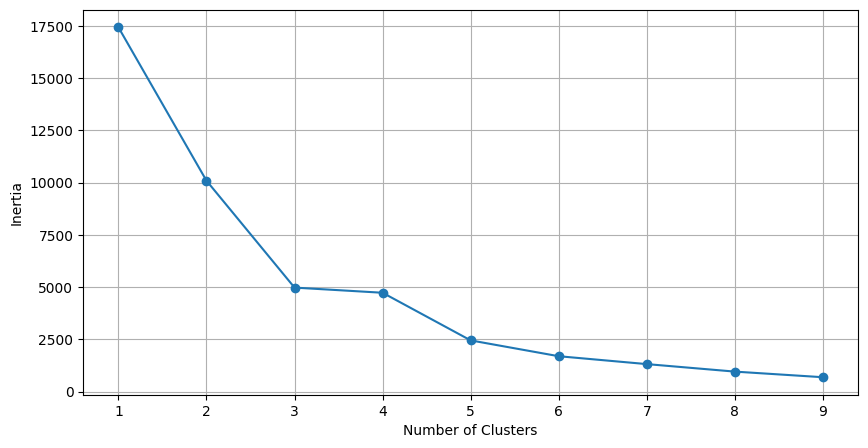

In [183]:
scaler = StandardScaler()

data[['Installs_T', 'Reviews_T', 'Rating_T']] = scaler.fit_transform(data[['Installs', 'Reviews', 'Rating']])

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(data[['Installs_T', 'Rating_T']], 10)

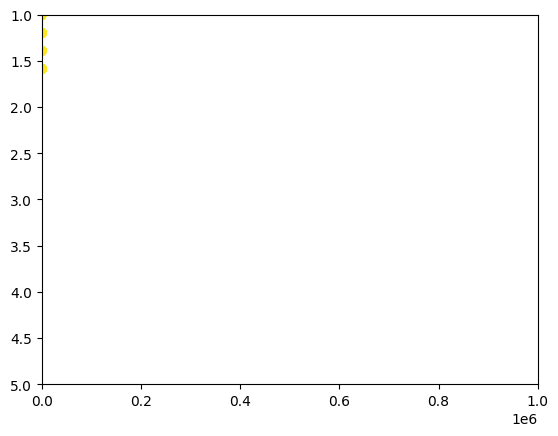

In [184]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[['Installs_T', 'Rating_T']])
data['kmeans_2'] = kmeans.labels_

plt.scatter(x=data['Installs_T'], y=data['Rating_T'], c=data['kmeans_2'])
plt.xlim(0, 1000000)
plt.ylim(5, 1.0)
plt.show()